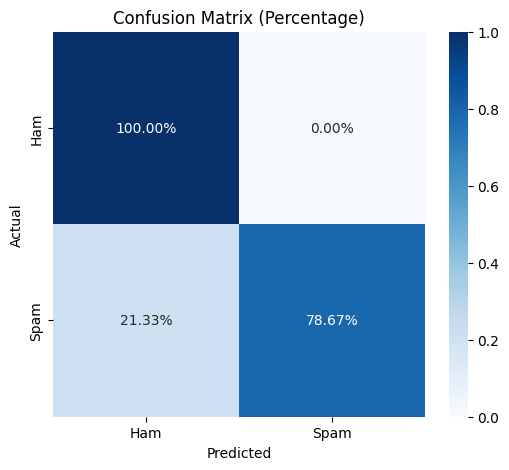

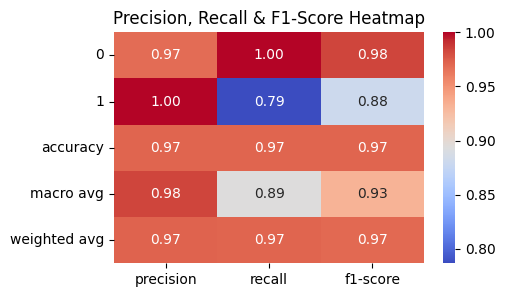

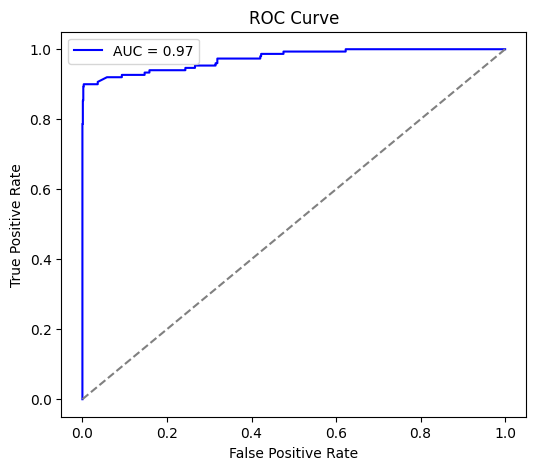

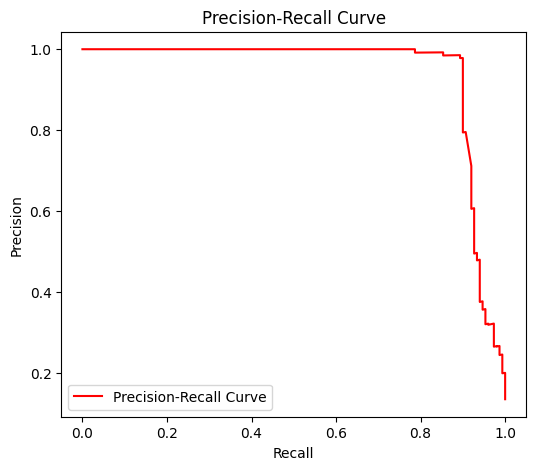

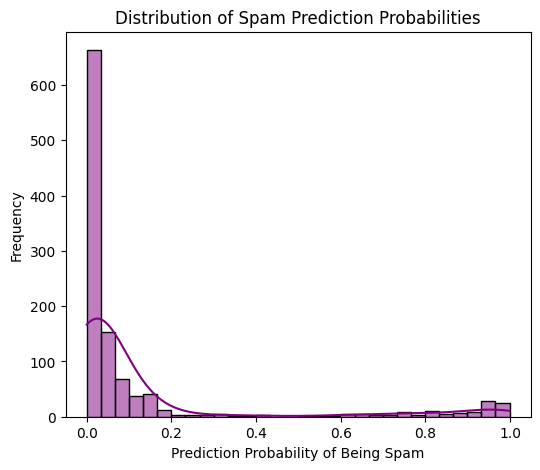

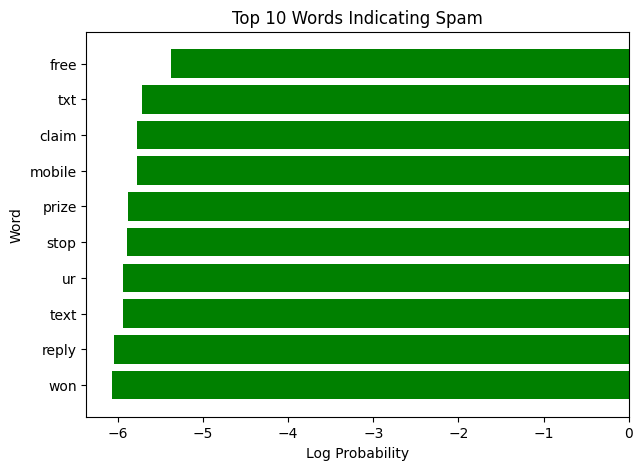


🔍 Sample of Misclassified Messages:
📩 would you like to see my xxx pics they are so hot they were nearly banned in the uk
📩 s flirting now txt girl or bloke  ur name  age eg girl zoe  to  to join and get chatting
📩 bloomberg message center  why wait apply for your future httpcareers bloombergcom
📩 download as many ringtones as u like no restrictions s  choose u can even send  yr buddys txt sir to
📩 email alertfrom jeri stewartsize kbsubject lowcost prescripiton drvgsto listen to email call
✅ Accuracy: 0.97

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

📩 Message: Congratulations! You've won a free iPhone. Click here to claim. → Spam


In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Load Dataset
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = df.iloc[:, [0, 1]]  # Selecting only relevant columns
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary (0 = Ham, 1 = Spam)

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    return text.strip()  # Remove leading and trailing spaces

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['label'], test_size=0.2, random_state=42)

# Build Model Pipeline
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict Results
y_pred = model.predict(X_test_tfidf)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Probability scores for ROC

# ✅ Confusion Matrix with Percentage Values
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Percentage)")
plt.show()

# ✅ F1-Score Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
plt.figure(figsize=(5, 3))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Precision, Recall & F1-Score Heatmap")
plt.show()

# ✅ ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ✅ Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="red", label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# ✅ Histogram of Prediction Probabilities
plt.figure(figsize=(6, 5))
sns.histplot(y_prob, bins=30, kde=True, color="purple")
plt.xlabel("Prediction Probability of Being Spam")
plt.ylabel("Frequency")
plt.title("Distribution of Spam Prediction Probabilities")
plt.show()

# ✅ Top 10 Important Features (Words)
feature_names = np.array(vectorizer.get_feature_names_out())

# Get log probabilities of features for spam (class index = 1)
spam_word_importance = model.feature_log_prob_[1, :]

# Select top 10 words
top_10_indices = np.argsort(spam_word_importance)[-10:]

plt.figure(figsize=(7, 5))
plt.barh(feature_names[top_10_indices], spam_word_importance[top_10_indices], color="green")
plt.xlabel("Log Probability")
plt.ylabel("Word")
plt.title("Top 10 Words Indicating Spam")
plt.show()

# ✅ Misclassified Samples Analysis
misclassified_indexes = np.where(y_test != y_pred)[0]
misclassified_samples = X_test.iloc[misclassified_indexes]

print("\n🔍 Sample of Misclassified Messages:")
for msg in misclassified_samples.sample(5, random_state=42):
    print(f"📩 {msg}")

# ✅ Accuracy & Report
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print(classification_report(y_test, y_pred))

# Function to Predict New Messages
def predict_spam(text):
    processed_text = preprocess_text(text)
    return "Spam" if model.predict(vectorizer.transform([processed_text]))[0] == 1 else "Not Spam"

# Test with a Sample Message
sample_message = "Congratulations! You've won a free iPhone. Click here to claim."
print(f"📩 Message: {sample_message} → {predict_spam(sample_message)}")
